# Plotting of figures in the article "Efficient neural decoding of self-location with a deeprecurrent network"

In [1]:
#set up nicer color scheme
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),  
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),  
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),
(188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]
# Rescale to values between 0 and 1 
for i in range(len(tableau20)):  
    r, g, b = tableau20[i]  
    tableau20[i] = (r / 255., g / 255., b / 255.)

In [2]:
%matplotlib inline
import matplotlib.style
import matplotlib as mpl
mpl.style.use('classic')
import numpy as np

# this file contains the perfromance of 10 models on R2192 "grep"-ed from the actual log files
f=open("R2192_grepped_predictions.log")
lines = f.readlines()
f.close()

# fill a dictionary where keys are timewindow sizes, filled with [mean, median] for 10 models
RNN_stats={}
for line in lines:
    pieces=line.split(" ")
    win_size = pieces[0].split("x")[1]
    win_size = int(win_size[:win_size.find("_")])
    median = float(pieces[-1])
    mean = float(pieces[-5][:-1])
    if win_size in RNN_stats.keys():
        RNN_stats[win_size].append([mean, median])
    else:
        RNN_stats[win_size]=[[mean, median]]
print(RNN_stats[1400])


[[13.0664, 10.5451], [12.0699, 10.205], [12.9273, 10.2736], [12.1677, 9.90662], [12.2038, 10.0524], [12.6064, 10.3699], [12.9382, 10.6653], [12.1247, 10.3135], [12.4882, 10.4527], [12.6988, 10.5122]]


In [3]:
from scipy.io import loadmat

# Results with Bayes with flat prior (MLE)
# imported as a dictionary, each item in dictionary contains results for all 5 rats
# first rat is R2192 (index 0)
bay_field_dict = loadmat("Bayes_res/Fig1&3ab_decodingDataForOpenField.mat")
#bay_field_dict = loadmat("Bayes_res/2dDecodeAllRatsAllWindowsNaiveBayesNoTruncate.mat")
print(bay_field_dict.keys())
flat_medians=bay_field_dict['medianErr']
flat_means= bay_field_dict['meanErr']
flat_win = bay_field_dict['tWin2Test'].flatten()
print(flat_win.shape, flat_means[:, 0].shape)
print("\n for Table 1: ", bay_field_dict["bstMean"])

""" for Table 1:  [[ 15.82963073  16.06929415  17.86089428  18.81734775  17.03691594]
 [  2.8          3.8          2.8          2.8          3.4       ]]"""

dict_keys(['__header__', '__version__', '__globals__', 'bstMean', 'bstMedian', 'tWin2Test', 'meanErr', 'medianErr', 'nCells'])
(50,) (50,)

 for Table 1:  [[15.82963073 16.06929415 17.86089428 18.81734775 17.03691594]
 [ 2.8         3.8         2.8         2.8         3.4       ]]


' for Table 1:  [[ 15.82963073  16.06929415  17.86089428  18.81734775  17.03691594]\n [  2.8          3.8          2.8          2.8          3.4       ]]'

In [4]:

# Results with Bayes with flat prior (MLE)
# imported as a dictionary, each item in dictionary contains results for all 5 rats
# first rat is R2192 (index 0)

# bay_field_dict_history_h5 = loadmat("Bayes_res/oldParams_2dDecodeFullBayesWithHistorySigma1History5.mat") #old params
bay_field_dict_history = loadmat("Bayes_res/Fig1&3ab_2dDecodeFullBayesWithHistorySigma1History15.mat")
#bay_field_dict_history = loadmat("Bayes_res/2dDecodeAllRatsAllWindowsBayesWithHistorySpeed1History15NoTruncate.mat")
print(bay_field_dict_history.keys())
memory_medians = bay_field_dict_history['medianErr']
memory_means = bay_field_dict_history['meanErr']
memory_win = bay_field_dict_history['tWin2Test'].flatten()

print(memory_means[:, 0])
print(memory_medians[:, 0])
print(np.min(memory_medians, axis=0))

print("\n for Table 1: ", bay_field_dict_history["bstMean"])
""" for Table 1:  [[ 15.46168191  14.99576142  16.5269506   18.26098815  16.40828295]
 [  2.           1.8          2.8          2.6          3.4       ]]"""

dict_keys(['__header__', '__version__', '__globals__', 'bstMean', 'bstMedian', 'tWin2Test', 'meanErr', 'medianErr', 'animalStruct'])
[24.286548   20.1091697  18.88836855 17.16478285 16.50272809 16.19195993
 15.60136635 16.02288913 15.90528063 15.46168191 15.48614508 15.55146944
 15.92495693 15.6261484  15.862779   16.473702   16.24777461 16.54993955
 17.23907121 16.81078971]
[18.         14.         12.64911064 12.16552506 12.         11.66190379
 11.3137085  11.66190379 12.         11.66190379 12.16552506 12.16552506
 12.16552506 12.16552506 12.16552506 12.80624847 12.80624847 14.
 14.14213562 14.07106781]
[11.3137085  12.         12.64911064 13.11132817 12.16552506]

 for Table 1:  [[15.46168191 14.99576142 16.5269506  18.26098815 16.40828295]
 [ 2.          1.8         2.8         2.6         3.4       ]]


' for Table 1:  [[ 15.46168191  14.99576142  16.5269506   18.26098815  16.40828295]\n [  2.           1.8          2.8          2.6          3.4       ]]'

[15.749720000000002, 14.582939999999999, 13.849279999999998, 13.020760000000001, 12.82216, 12.537040000000001, 12.529140000000002, 12.772120000000001, 12.70398, 12.8947, 13.08008, 13.037, 13.3928, 13.5506, 13.70824, 14.054680000000001, 14.1625, 14.253620000000002, 14.82126, 15.23254] 
 [32.99970591 26.14487801 22.95486977 20.71063767 19.24434931 18.35859582
 17.54049586 17.17650093 16.905152   16.6330562  16.05773889 16.26150069
 16.33894394 15.82963073 16.2730693  16.7972131  16.51757422 16.70508286
 17.32687437 16.82956579 17.47302381 18.06016392 18.26065166 18.30502924
 18.45324037 18.8147584  18.41744865 19.27773156 19.19951143 19.22406996
 18.89978939 19.47358911 19.82487429 20.23764865 20.13583317 20.45772091
 19.8129652  20.66105166 20.37870697 21.11853925 21.31479233 21.90151364
 21.34928237 22.40957705 21.73248057 22.46651161 22.01371864 21.98998134
 22.89314417 24.18287872]


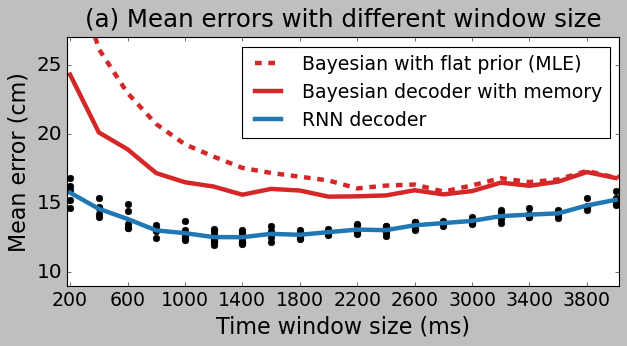

In [5]:
import matplotlib.pyplot as plt

average = []
# draw individual model's performance as dots
plt.figure(figsize=(8,4.5))
for size in sorted(RNN_stats.keys()):
        means = np.array(RNN_stats[size])[:,0]
        plt.plot([size]*len(means), means, "o", color="black")
        average.append(np.mean(means))

print(average, "\n", flat_means[:, 0])

plt.xlabel("Time window size (ms)",fontsize=20)
plt.ylabel("Mean error (cm)",fontsize=20)

plt.xticks(fontsize=17)
plt.yticks(fontsize=18)

plt.xlim([175,4025])
plt.ylim([9,27])
plt.xticks(np.arange(200,4001,400))

plt.plot(flat_win*1000, flat_means[:,0], color=tableau20[6], linewidth=4,label="Bayesian with flat prior (MLE)", linestyle="dashed")
plt.plot(memory_win*1000, memory_means[:,0], color=tableau20[6], linewidth=4,label="Bayesian decoder with memory")
plt.plot(sorted(RNN_stats.keys()), average, color=tableau20[0], linewidth=4, label="RNN decoder")

plt.legend(fontsize=17)
plt.title("(a) Mean errors with different window size",fontsize=22,y=1.02)
plt.tight_layout()
#plt.show()
plt.savefig("R2192_windows_mean_3models.png")

[13.00054, 11.7352, 10.773660000000001, 10.38964, 10.36356, 10.183545, 10.329632, 10.47446, 10.593620000000001, 10.739419999999999, 11.08736, 11.16098, 11.52776, 11.73818, 11.898140000000001, 12.077100000000002, 12.23288, 12.27928, 12.653279999999999, 13.027420000000001] 

[22.36067977 16.4924225  14.4222051  13.41640786 12.80624847 12.16552506
 12.         12.16552506 12.16552506 12.         12.16552506 12.16552506
 12.64911064 12.16552506 12.64911064 13.41640786 13.41640786 14.
 14.28217036 14.14213562 15.23154621 14.28217036 15.23154621 14.4222051
 15.62049935 15.23154621 15.23154621 16.4924225  16.97056275 16.1245155
 15.81024968 16.1245155  17.02928512 17.88854382 16.4924225  17.20465053
 17.20465053 17.20465053 18.05538514 17.08800749 18.43908891 18.92081411
 18.97366596 18.97366596 19.33569078 18.65352559 19.89949494 19.74835274
 20.         21.26029163]
[18.         14.         12.64911064 12.16552506 12.         11.66190379
 11.3137085  11.66190379 12.         11.66190379 12.1

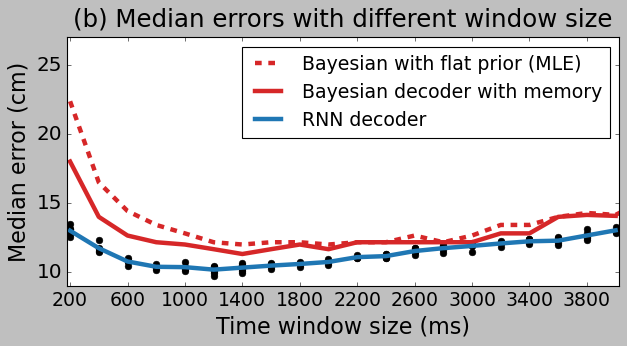

In [6]:
import matplotlib.pyplot as plt
average = []

plt.figure(figsize=(8,4.5))
for size in sorted(RNN_stats.keys()):
        medians = np.array(RNN_stats[size])[:,1]
        plt.plot([size]*len(medians), medians, "o", color="black")
        average.append(np.mean(medians))
print(average, "\n")
print(flat_medians[:, 0])
print(memory_medians[:, 0])

#plt.title("Median prediction error for R2192 in function of timewindow size",fontsize=20)
plt.xlabel("Time window size (ms)",fontsize=20)
plt.ylabel("Median error (cm)",fontsize=20)

plt.xlim([175,4025])
plt.ylim([9,27])
plt.xlim([175,4025])
plt.xticks(fontsize=17)
plt.yticks(fontsize=18)
plt.xticks(np.arange(200,4001,400))

plt.plot(flat_win*1000, flat_medians[:,0], color=tableau20[6], linewidth=4,label="Bayesian with flat prior (MLE)",linestyle="dashed")
plt.plot(memory_win*1000, memory_medians[:,0], color=tableau20[6], linewidth=4,label="Bayesian decoder with memory")
plt.plot(sorted(RNN_stats.keys()), average, color=tableau20[0], linewidth=4,label="RNN decoder")

plt.legend(fontsize=17)
plt.title("(b) Median errors with different window size",fontsize=22,y=1.02)
plt.tight_layout()
plt.savefig("R2192_windows_median_3models.png")

In [7]:
# to see the order of animals in the Bayesian results file (what index each animal corrsponds to)
for animal_info in bay_field_dict_history["animalStruct"][0]:
    print(animal_info[0], np.shape(animal_info[1]))


['R2192 - screening/20141001_R2192_screening'] (1, 20)
['R2198 - screening/20140920_R2198_screening'] (1, 20)
['R2217 - screening/20141218_R2117_screening'] (1, 20)
['R2336 - screening/20151104_R2336_screening'] (1, 20)
['R2337 - screening/20151127_R2337_screening'] (1, 20)


In [8]:
# Printouts of Bayesian results
print(np.min(flat_means, axis=0))
print(np.min(flat_medians, axis=0))

print(np.min(memory_means, axis=0))
print(np.min(memory_medians, axis=0))

[15.82963073 16.06929415 17.86089428 18.81734775 17.03691594]
[12.         12.64911064 14.14213562 14.         12.16552506]
[15.46168191 14.99576142 16.5269506  18.26098815 16.40828295]
[11.3137085  12.         12.64911064 13.11132817 12.16552506]


In [9]:
a=[1,3,2,4,0]
np.min(memory_means, axis=0)[a]

array([14.99576142, 18.26098815, 16.5269506 , 16.40828295, 15.46168191])

<Figure size 640x480 with 0 Axes>

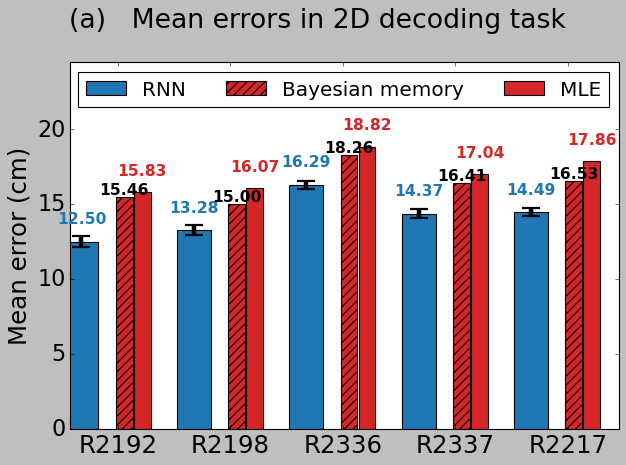

In [10]:
plt.clf()

labels =["R2192", "R2198","R2336","R2337", "R2217"]
order_of_animals = [0,1,3,4,2]
# results from RNN exctracted from log files and averaged
means = [12.50484, 13.27721, 16.28584545, 14.36655,  14.4936]
mean_std = [0.3846042705, 0.3226775496, 0.269230256, 0.2945978247,0.2544971159]

medians = [10.3296,10.75701,13.09772, 11.3265, 11.73398]
median_std =[0.23188, 0.31606,0.19988, 0.15216, 0.24249]

# Results from flat Bayes (see the cell above), notice that order of animals is different, 
# we move R2217 to the end as it has least neurons
bayes =  np.min(flat_means, axis=0)[order_of_animals] #[ 15.82963073,  16.06929415, 18.81734775,  17.03691594,  17.86089428 ]
bayes_med =  np.min(flat_medians, axis=0)[order_of_animals]#[ 12.,   12.64911064 ,   14. ,  12.16552506, 14.14213562]

# Results from Bayes with memory (see the cell above), notice that order of animals is different, 
# we move R2217 to the end as has least neurons
memory_bayes =  np.min(memory_means, axis=0)[order_of_animals] #[ 15.46168191,  14.99576142,  18.26098815,  16.40828295, 16.5269506] 
memory_bayes_med = np.min(memory_medians, axis=0)[order_of_animals] #[ 11.3137085,  12., 13.11132817,  12.16552506, 12.64911064]

#plot Bayes_flat, Bayes_memory and RNN
fig, ax = plt.subplots(figsize=(8,6))
indx=np.arange(5)
width=0.3
# RNN
rects1 = ax.bar(indx, means, width, color=tableau20[0], yerr=mean_std, error_kw={"linewidth":4, "ecolor":"black", "capsize":8,"capthick":2})
# Bayes mem
rects2 = ax.bar(indx + width+0.08, memory_bayes, width/2, color=tableau20[6], hatch='///')
# Bayes flat
rects3 = ax.bar(indx + width*1.5+0.09, bayes, width/2, color=tableau20[6])


# add some text for labels, title and axes ticks
plt.ylabel('Mean error (cm)',fontsize=22)
ax.set_xticks(indx + width+0.025)
ax.set_xticklabels(labels,fontsize=22)
ax.legend((rects1[0], rects2[0], rects3[0]), ('RNN',"Bayesian memory", "MLE"),ncol=3,fontsize=18)

plt.yticks(fontsize=20)
plt.ylim([0,24.5])
plt.xlim([-0.1,4.78])
plt.title("(a)   Mean errors in 2D decoding task",fontsize=24,y=1.08, x=0.45)

def autolabel(rects):
    # attach some text labels
    for i,rect in enumerate(rects):
        height = rect.get_height()
        col=tableau20[0]
        if height in memory_bayes:
            col="black"
            ax.text(rect.get_x() + rect.get_width()/2., 1.0*height,
                '%.2f' % height,
                ha='center', va='bottom',color=col,weight="bold", size=14)
        elif height in bayes:
            col=tableau20[6]
            ax.text(rect.get_x() + rect.get_width()/2., 1.025*height+0.5,
                '%.2f' % height,
                ha='center', va='bottom',color=col,weight="bold", size=14)
        else:
            ax.text(rect.get_x() + rect.get_width()/2., 1.05*height+mean_std[i],
                '%.2f' % height,
                ha='center', va='bottom',color=col,weight="bold", size=14)
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.tight_layout()

#plt.savefig("mean_erors.eps",format='eps')
plt.savefig("mean_errors.png",format='png')
plt.show()

<Figure size 640x480 with 0 Axes>

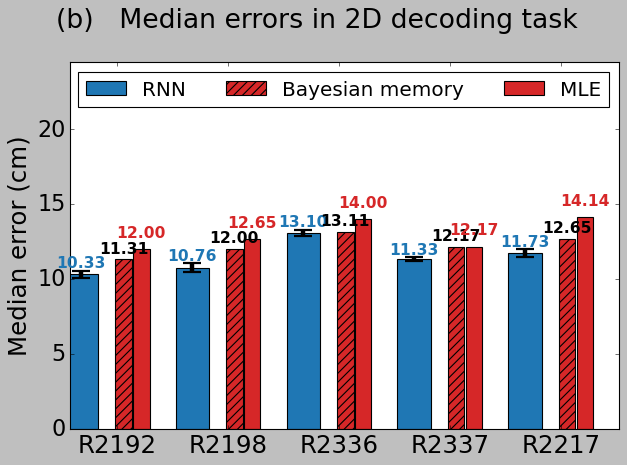

In [11]:
plt.clf()

labels =["R2192", "R2198","R2336","R2337", "R2217"]
#results from RNN
means = [12.50484, 13.27721, 16.28584545, 14.36655,  14.4936]
mean_std = [0.3846042705, 0.3226775496, 0.269230256, 0.2945978247,0.2544971159]
medians = [10.3296,10.75701,13.09772, 11.3265, 11.73398]
median_std =[0.23188, 0.31606,0.19988, 0.15216, 0.24249]

# Results from flat Bayes (see the cell above), notice that order of animals is different, 
# we move R2217 to the end as it has least neurons
bayes =  np.min(flat_means, axis=0)[order_of_animals] #[ 15.82963073,  16.06929415, 18.81734775,  17.03691594,  17.86089428 ]
bayes_med =  np.min(flat_medians, axis=0)[order_of_animals]#[ 12.,   12.64911064 ,   14. ,  12.16552506, 14.14213562]

# Results from Bayes with memory (see the cell above), notice that order of animals is different, 
# we move R2217 to the end as has least neurons
memory_bayes =  np.min(memory_means, axis=0)[order_of_animals] #[ 15.46168191,  14.99576142,  18.26098815,  16.40828295, 16.5269506] 
memory_bayes_med = np.min(memory_medians, axis=0)[order_of_animals] #[ 11.3137085,  12., 13.11132817,  12.16552506, 12.64911064]


#plot Bayes_flat, Bayes_memory and RNN
fig, ax = plt.subplots(figsize=(8,6))
indx=np.arange(5)
width=0.3
# RNN, flat, memory
rects1 = ax.bar(indx, medians, width, color=tableau20[0], yerr=median_std, error_kw={"linewidth":4, "ecolor":"black", "capsize":8,"capthick":2})
rects2 = ax.bar(indx + width+0.08, memory_bayes_med, width/2, color=tableau20[6], hatch="///")
rects3 = ax.bar(indx + width*1.5+0.09, bayes_med, width/2, color=tableau20[6])

# add some text for labels, title and axes ticks
plt.ylabel('Median error (cm)',fontsize=22)
ax.set_xticks(indx + width+0.025)
ax.set_xticklabels(labels,fontsize=22)

ax.legend((rects1[0], rects2[0],rects3[0]), ('RNN',"Bayesian memory","MLE"),ncol=3,fontsize=18)
plt.yticks(fontsize=20)
plt.ylim([0,24.5])
plt.xlim([-0.1,4.85])
plt.title("(b)   Median errors in 2D decoding task",fontsize=24,y=1.08, x=0.45)


def autolabel(rects):
    # attach some text labels
    for i,rect in enumerate(rects):
        height = rect.get_height()
        col=tableau20[0]
        if height in memory_bayes_med:
            col="black"
            if height== 13.1113:
                ax.text(rect.get_x() + rect.get_width()/2., 1.02*height+0.4,
                    '%.2f' % height,
                    ha='center', va='bottom',color=col,weight="bold", size=14)
            else:
                ax.text(rect.get_x() + rect.get_width()/2., 1.02*height,
                    '%.2f' % height,
                    ha='center', va='bottom',color=col,weight="bold", size=14)
        elif height in bayes_med:
            col=tableau20[6]
            if height== 12.16552506:
                ax.text(rect.get_x() + rect.get_width()/2., 1.0*height+1.6,
                    '%.2f' % height,
                    ha='center', va='bottom',color=col,weight="bold", size=14)
            else:
                ax.text(rect.get_x() + rect.get_width()/2., 1.0*height+0.6,
                    '%.2f' % height,
                    ha='center', va='bottom',color=col,weight="bold", size=14)
        else:
            ax.text(rect.get_x() + rect.get_width()/2., 1.0*height+median_std[i],
                '%.2f' % height,
                ha='center', va='bottom',color=col,weight="bold", size=14)

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
plt.tight_layout()

#plt.savefig("median_erors.eps",format='eps')
plt.savefig("median_errors.png",format='png')
plt.show()

#  ------------------------
# 1D decoding task
#  ------------------------


In [12]:
# Bayesian results with flat prior
bay_track_dict_flat = loadmat("Bayes_res/Fig3cd_decodingDataForLinearizedT-mazeDiscard1st25s.mat")
print(bay_track_dict_flat.keys())
t_flat_medians = bay_track_dict_flat['medianErr']
t_flat_means = bay_track_dict_flat['meanErr']
t_flat_win = bay_track_dict_flat['tWin2Test'].flatten()
print(t_flat_win.shape, t_flat_means[:, 0].shape)
print(t_flat_win, t_flat_means[:, 0])

print("##################")
print(bay_track_dict_flat["bstMean"])
print(bay_track_dict_flat["bstMedian"])

dict_keys(['__header__', '__version__', '__globals__', 'bstMean', 'bstMedian', 'tWin2Test', 'meanErr', 'medianErr'])
(50,) (50,)
[ 0.2  0.4  0.6  0.8  1.   1.2  1.4  1.6  1.8  2.   2.2  2.4  2.6  2.8
  3.   3.2  3.4  3.6  3.8  4.   4.2  4.4  4.6  4.8  5.   5.2  5.4  5.6
  5.8  6.   6.2  6.4  6.6  6.8  7.   7.2  7.4  7.6  7.8  8.   8.2  8.4
  8.6  8.8  9.   9.2  9.4  9.6  9.8 10. ] [ 92.72792398  74.89868228  64.06901099  58.6797654   53.53382353
  49.41938326  45.85257732  45.46588235  46.06622517  45.43111111
  45.21788618  45.54513274  48.26153846  45.81458333  46.74222222
  46.73095238  54.15443038  53.01066667  56.4028169   54.30149254
  55.65        59.52459016  58.26551724  62.01785714  62.6754717
  63.82352941  65.13061224  63.0212766   66.0173913   70.36363636
  70.33488372  69.46829268  71.87        75.46153846  76.02631579
  76.4972973   79.05555556  76.76        78.15294118  84.14545455
  85.14375     85.04516129  88.54666667  87.00666667  90.59310345
  89.9         99.33571

In [13]:
# Bayesian results with memory
#bay_track_dict_history_old = loadmat("Bayes_res/1dDecodeFullBayesWithHistorySigma5History15.mat") # old params
bay_track_dict_history = loadmat("Bayes_res/Fig3cd_1dDecodeFullBayesWithHistorySigma5History15ExcludeFirst25.mat")

print(bay_track_dict_history.keys())
t_memory_medians = bay_track_dict_history['medianErr']
t_memory_means = bay_track_dict_history['meanErr']
t_memory_win = bay_track_dict_history['tWin2Test'].flatten()

print(np.min(t_memory_means, axis=0))
print(np.min(t_memory_medians, axis=0))

print("##################")
print(bay_track_dict_history["bstMean"])
print(bay_track_dict_history["bstMedian"])

dict_keys(['__header__', '__version__', '__globals__', 'bstMean', 'bstMedian', 'tWin2Test', 'meanErr', 'medianErr', 'animalStruct'])
[44.11041667 65.38104265 75.1372093  59.35448718 66.03916084]
[ 8. 10. 24.  8. 10.]
##################
[[44.11041667 65.38104265 75.1372093  59.35448718 66.03916084]
 [ 2.8         1.8         3.6         0.4         3.8       ]]
[[ 8.  10.  24.   8.  10. ]
 [ 0.4  1.8  1.   0.4  1. ]]


In [14]:
# Results with Bayes
print(np.min(t_memory_means, axis=0))
print(np.min(t_flat_means, axis=0))
print(np.min(t_memory_medians, axis=0))
print(np.min(t_flat_medians, axis=0))

[44.11041667 65.38104265 75.1372093  59.35448718 66.03916084]
[45.21788618 52.29189189 73.98571429 63.53548387 69.39569892]
[ 8. 10. 24.  8. 10.]
[ 8.  8. 24.  8. 10.]


<Figure size 640x480 with 0 Axes>

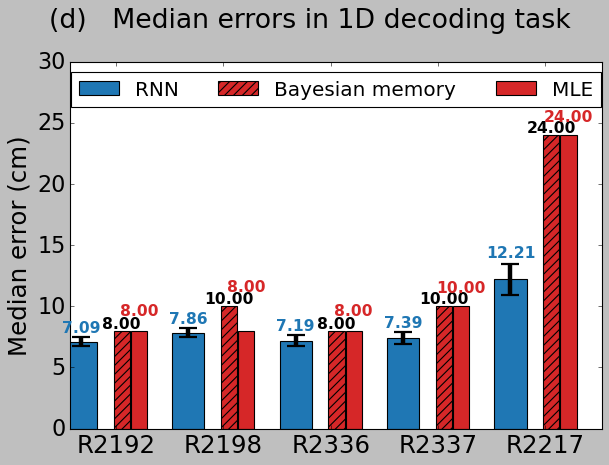

In [15]:
# plotting of results in 1D

labels =["R2192", "R2198","R2336","R2337", "R2217"]

# results from RNN
median = [7.09, 7.86, 7.19, 7.39, 12.21]
means = [ 14.508, 22.273, 22.724,21.087, 23.296]
mean_std = [3.7650, 1.292, 6.9994, 0.62, 2.003]
median_std =[0.37, 0.36, 0.46, 0.49, 1.30] 

# Order of animals is changed compared to indexing in the .mat files
bayes_med = [8,8.00001,8,10,24] # 00001 is added to identify the value later in plotting
bayes_mean = [ 45.21788618, 52.29189189, 63.53548387, 69.39569892, 73.98571429]

# Order of animals is changed compared to indexing in the .mat files
memory_bayes_med = [8.001,10.001,8.001,10.001,24.001]
memory_bayes_mean = [ 44.11041667, 65.38104265, 59.35448718, 66.03916084, 75.1372093]

plt.clf()

fig, ax = plt.subplots(figsize=(8,6))
indx=np.arange(5)
width=0.3
rects1 = ax.bar(indx, median, width, color=tableau20[0], yerr=median_std, error_kw={"linewidth":4, "ecolor":"black", "capsize":8,"capthick":2})
rects2 = ax.bar(indx + width+0.08, memory_bayes_med, width/2, color=tableau20[6], hatch="///")
rects3 = ax.bar(indx + width*1.5+0.09, bayes_med, width/2, color=tableau20[6])

# add some text for labels, title and axes ticks
plt.ylabel('Median error (cm)',fontsize=22)
ax.set_xticks(indx + width+0.025)
ax.set_xticklabels(labels,fontsize=22)

ax.legend((rects1[0], rects2[0],rects3[0]), ('RNN',"Bayesian memory", "MLE"),ncol=3,fontsize=18, loc=9)
plt.yticks(fontsize=20)
plt.ylim([0,30.0])
plt.xlim([-0.1,4.85])
plt.title("(d)   Median errors in 1D decoding task",fontsize=24,y=1.08, x=0.45)


def autolabel(rects):
    # attach some text labels
    for i,rect in enumerate(rects):
        height = rect.get_height()
        col=tableau20[0]
        if height in memory_bayes_med:
            col="black"
            ax.text(rect.get_x() + rect.get_width()/2., 1.0*height,
                '%.2f' % height,
                ha='center', va='bottom',color=col,weight="bold", size=14)
        elif height in bayes_med:
            col=tableau20[6]
            if height==8.00001:
                ax.text(rect.get_x() + rect.get_width()/2., 11.0,
                    '%.2f' % height,
                    ha='center', va='bottom',color=col,weight="bold", size=14)
            else:
                ax.text(rect.get_x() + rect.get_width()/2., np.max((9.0,1.0*height+0.9)),
                    '%.2f' % height,
                    ha='center', va='bottom',color=col,weight="bold", size=14)
        else:
            ax.text(rect.get_x() + rect.get_width()/2., 1.025*height + median_std[i],
                '%.2f' % height,
                ha='center', va='bottom',color=col,weight="bold", size=14)
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
plt.tight_layout()

#plt.savefig("1D_median_errors.eps",format='eps')
plt.savefig("1D_median_errors.png",format='png')
plt.show()

<Figure size 640x480 with 0 Axes>

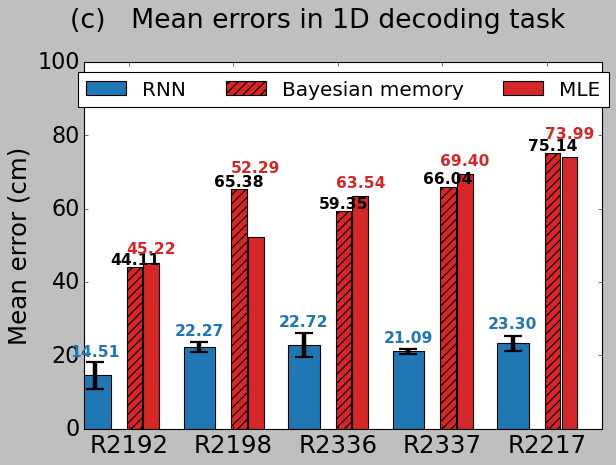

In [16]:
#results in 1D

labels =["R2192", "R2198","R2336","R2337", "R2217"]

# Order of animals is changed compared to indexing in the .mat files
median = [7.09, 7.86, 7.19, 7.39, 12.21]
means = [ 14.508, 22.273, 22.724,21.087, 23.296]
mean_std = [3.7650, 1.292,3.287, 0.617, 2.003]
median_std =[0.37, 0.36, 0.46,0.49, 1.30] 

# Order of animals is changed compared to indexing in the .mat files
bayes_med = [8,8.00001,8,10,24] # 00001 is added to identify the value later in plotting
bayes_mean = [ 45.21788618, 52.29189189, 63.53548387, 69.39569892, 73.98571429]

# Order of animals is changed compared to indexing in the .mat files
memory_bayes_med = [8.001,10.001,8.001,10.001,24.001]
memory_bayes_mean = [ 44.11041667, 65.38104265, 59.35448718, 66.03916084, 75.1372093]

plt.clf()
fig, ax = plt.subplots(figsize=(8,6))
indx=np.arange(5)
width=0.3
rects1 = ax.bar(indx, means, width, color=tableau20[0], yerr=mean_std, error_kw={"linewidth":4, "ecolor":"black", "capsize":8,"capthick":2})
rects2 = ax.bar(indx + width+0.08, memory_bayes_mean, width/2, color=tableau20[6], hatch="///")
rects3 = ax.bar(indx + width*1.5+0.09, bayes_mean, width/2, color=tableau20[6])

# add some text for labels, title and axes ticks
plt.ylabel('Mean error (cm)',fontsize=22)
ax.set_xticks(indx + width+0.025)
ax.set_xticklabels(labels,fontsize=22)

ax.legend((rects1[0], rects2[0],rects3[0]), ('RNN',"Bayesian memory","MLE"),ncol=3,fontsize=18, loc=9)
plt.yticks(fontsize=20)
plt.ylim([0,100])
plt.xlim([-0.1,4.85])
plt.title("(c)   Mean errors in 1D decoding task",fontsize=24,y=1.08, x=0.45)


def autolabel(rects):
    # attach some text labels
    for i,rect in enumerate(rects):
        height = rect.get_height()
        col=tableau20[0]
        if height in memory_bayes_mean:
            col="black"
            ax.text(rect.get_x() + rect.get_width()/2., 1.0*height,
                '%.2f' % height,
                ha='center', va='bottom',color=col,weight="bold", size=14)
        elif height in bayes_mean:
            col=tableau20[6]
            if height==  45.21788618:
                ax.text(rect.get_x() + rect.get_width()/2., 47,
                    '%.2f' % height,
                    ha='center', va='bottom',color=col,weight="bold", size=14)
            elif height== 52.29189189:
                ax.text(rect.get_x() + rect.get_width()/2., 69,
                    '%.2f' % height,
                    ha='center', va='bottom',color=col,weight="bold", size=14)
            elif height== 73.98571429:
                ax.text(rect.get_x() + rect.get_width()/2., 78.5,
                    '%.2f' % height,
                    ha='center', va='bottom',color=col,weight="bold", size=14)
            else:
                ax.text(rect.get_x() + rect.get_width()/2., 1.025*height,
                    '%.2f' % height,
                    ha='center', va='bottom',color=col,weight="bold", size=14)
        else:
            #print mean_std[i//2]
            ax.text(rect.get_x() + rect.get_width()/2., 1.05*height+mean_std[i],
                '%.2f' % height,
                ha='center', va='bottom',color=col,weight="bold", size=14)
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
plt.tight_layout()

#plt.savefig("1D_mean_erors.eps",format='eps')
plt.savefig("1D_mean_errors.png",format='png')
plt.show()

# Statistics about sensitivity

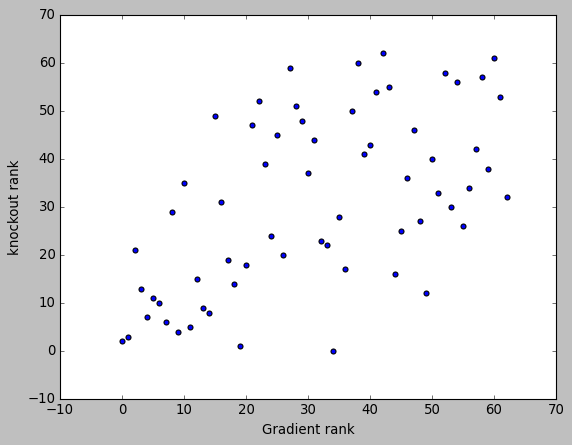

 Pearson correlation between gradient and knockout rankings is:
 (0.5670122887864824, 1.2664596234831417e-06)
 Pearson correlation between knockout rankings and rankings by firing rate:
 (0.5032642089093702, 2.622315394396928e-05)


### Spatial nformation ###
 Pearson correlation between knockout rankings and rankings by information:
 (0.09024577572964669, 0.48180840910794054)
 Pearson correlation between grad rankings and rankings by information:
 (0.2245103686635945, 0.07689891333209607)


### FIRING RATE ##
 Pearson correlation between grad rankings and rankings by firing rate:
 (0.04608294930875575, 0.719865818336725)
 Pearson correlation between information rankings and rankings by firing rate:
 (-0.15932219662058372, 0.21230868174133857)


In [17]:
import matplotlib.pyplot as plt
import scipy.io as scio

############### RANKINGS
grad = np.loadtxt("grad_rankings.txt") #given as list of neuron IDs in order of importance
knock = np.loadtxt("KO_rankings.txt") #given as list of neuron IDs in order of importance

#Skaggs
#information_th = np.loadtxt("spatial_information_R2192_2D.txt")
information_th = scio.loadmat("Bayes_res/skaggsInfo2d2cm.mat")["animalStruct"][0][0][1].flatten()
#information_th = np.loadtxt("spatial_information_R2192_2D.txt") #alternative

info_order = information_th.argsort()[::-1]
info_ranks = info_order.argsort() #rankings by by firing rate
#print "INFO",info_ranks

firing_rate = np.loadtxt("firing_rates.txt") #given as list of firing rates for each neuron
order = firing_rate.argsort()[::-1]
firing_ranks = order.argsort() #rankings by by firing rate
#print "FIRING",firing_ranks

G_order = [np.where(grad==x)[0][0] for x in range(63)] #need to turn into a list of ranks for each neuron
K_order = [np.where(knock==x)[0][0] for x in range(63)] #need to turn into a list of ranks
#diff = np.array(G_order)-np.array(K_order)
#dd={i:e for i,e in enumerate(diff)}

#print "GRAD",G_order
#print "KO",K_order

plt.scatter(G_order,K_order)
plt.ylabel("knockout rank")
plt.xlabel("Gradient rank")
plt.show()
#plt.scatter(firing_ranks,K_order)

#print np.argmax(diff),np.max(diff), np.argmin(diff),np.min(diff)
from scipy.stats import pearsonr

print(" Pearson correlation between gradient and knockout rankings is:\n", pearsonr(G_order, K_order))
#print K_order
print(" Pearson correlation between knockout rankings and rankings by firing rate:\n", pearsonr(firing_ranks, K_order))

print("\n\n### Spatial nformation ###")
print(" Pearson correlation between knockout rankings and rankings by information:\n", pearsonr(K_order, info_ranks))

print(" Pearson correlation between grad rankings and rankings by information:\n", pearsonr(G_order, info_ranks))

print("\n\n### FIRING RATE ##")
print(" Pearson correlation between grad rankings and rankings by firing rate:\n", pearsonr(firing_ranks, G_order))
print(" Pearson correlation between information rankings and rankings by firing rate:\n",
      pearsonr(firing_ranks, info_ranks))
